In [1]:
# train_test_split -- takes an X (inputs/examples) and y (outputs/answers)
#  returns X_train, X_test, y_train, y_test
#  train with X_train and y_train
#  test with X_test and y_test
#   we can check -- are the results (y_pred) the same as y_test?
#   if not the same, how close?

# cross_val_score -- function that does the same sort of testing
#  as train_test_split, but we don't have to do as much.  We can
#  swap out the algorithm for a different testing strategy

# the default strategy is StratifiedKFold, which means: create n
#  groups, each group *MUST* have at least one rep from each class
#  (category)

# another strategy is LeaveOneOut -- train with all but one
#  of the data points, and test with one data point.  With n
#  data points, we'll do n iterations, each giving 0/1 for 
#  successful prediction

In [3]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  # default: k=5

results = cross_val_score(model, X, y, cv=5)  # divide into 5 parts
Series(results).describe()

Populating the interactive namespace from numpy and matplotlib


count    5.000000
mean     0.973333
std      0.027889
min      0.933333
25%      0.966667
50%      0.966667
75%      1.000000
max      1.000000
dtype: float64

In [4]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  # default: k=5

results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
Series(results).describe()

Populating the interactive namespace from numpy and matplotlib


count    5.000000
mean     0.973333
std      0.027889
min      0.933333
25%      0.966667
50%      0.966667
75%      1.000000
max      1.000000
dtype: float64

In [7]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = KFold(n_splits=3, shuffle=True)

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  

results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
Series(results).describe()

Populating the interactive namespace from numpy and matplotlib


count    3.000000
mean     0.966667
std      0.011547
min      0.960000
25%      0.960000
50%      0.960000
75%      0.970000
max      0.980000
dtype: float64

In [8]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = LeaveOneOut()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

# model = KNeighborsClassifier(n_neighbors=11)
model = KNeighborsClassifier()  

results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
Series(results).describe()

# Use a "for" loop to iterate over all k values from 1 to 23
# Use cross_val_score and LeaveOneOut to identify the best
# value of k (highest mean, lowest std, lowest k)

Populating the interactive namespace from numpy and matplotlib


count    150.000000
mean       0.966667
std        0.180107
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

In [10]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = LeaveOneOut()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

all_results = []
for k in range(1, 24, 2):
    print(k, end=' ')
    model = KNeighborsClassifier(n_neighbors=k)

    results = cross_val_score(model, X, y, cv=strategy)  # divide into 5 parts
    all_results.append({'k':k, 
                        'mean':results.mean(), 
                        'std':results.std()})

# Use a "for" loop to iterate over all k values from 1 to 23
# Use cross_val_score and LeaveOneOut to identify the best
# value of k (highest mean, lowest std, lowest k)

1 3 5 7 9 11 13 15 17 19 21 23 

In [13]:
df = DataFrame(all_results).set_index('k')
df

,mean,std
k,,
1,0.960000,0.195959
3,0.960000,0.195959
5,0.966667,0.179505
7,0.966667,0.179505
9,0.966667,0.179505
11,0.973333,0.161107
13,0.966667,0.179505
15,0.973333,0.161107
17,0.973333,0.161107


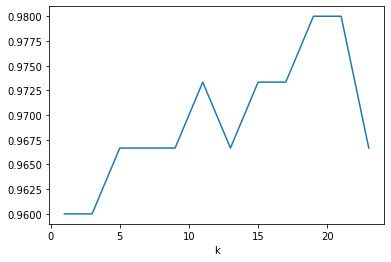

In [14]:
df['mean'].plot.line()

In [17]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  

results = cross_validate(model, X, y, cv=strategy)  # divide into 5 parts


In [18]:
results

{'fit_time': array([0.01580596, 0.01308513, 0.01501799, 0.05276299, 0.00981498]),
 'score_time': array([0.01788592, 0.02835894, 0.05560994, 0.02706718, 0.01465082]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [19]:
DataFrame(results)

,fit_time,score_time,test_score
0,0.015806,0.017886,0.966667
1,0.013085,0.028359,1.000000
2,0.015018,0.055610,0.933333
3,0.052763,0.027067,0.966667
4,0.009815,0.014651,1.000000


In [21]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier()  

results = cross_validate(model, X, y, cv=strategy, 
                         return_train_score=True)  # divide into 5 parts
DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.008005,0.018493,0.966667,0.966667
1,0.007895,0.011457,1.000000,0.966667
2,0.010417,0.012367,0.933333,0.975000
3,0.008073,0.012160,0.966667,0.975000
4,0.006127,0.009114,1.000000,0.966667


In [ ]:
# parametric model -- short and simple, usually using a 
#  mathematical equation to decide what's in each class.

# works well with regular, easily described data.

# LogisticRegression



# non-parametric model -- can be complex and use extra memory
#  or time.  

# works well with all sorts of data, including when it's not
# regularly distributed

# KNeighborsClassifier is non-parametric

In [23]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = LogisticRegression(solver='liblinear')  

results = cross_validate(model, X, y, cv=strategy, 
                         return_train_score=True) 
DataFrame(results)

,fit_time,score_time,test_score,train_score
0,0.024637,0.004684,1.000000,0.950000
1,0.023267,0.018279,0.966667,0.966667
2,0.015062,0.004546,0.933333,0.966667
3,0.015072,0.003305,0.900000,0.975000
4,0.009636,0.002806,1.000000,0.958333


In [24]:
DataFrame(results).mean()

fit_time       0.017535
score_time     0.006724
test_score     0.960000
train_score    0.963333
dtype: float64

In [25]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

model = KNeighborsClassifier(n_neighbors=17)

results = cross_validate(model, X, y, cv=strategy, 
                         return_train_score=True) 
DataFrame(results).mean()

fit_time       0.014668
score_time     0.017899
test_score     0.966667
train_score    0.975000
dtype: float64

In [ ]:
# Use Logistic Regression to make iris predictions
# How does it do?


In [28]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, LeaveOneOut

strategy = StratifiedKFold()

iris = load_iris()
X = DataFrame(iris.data, columns=iris.feature_names)
y = Series(iris.target)

knn = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear')  

for model in [knn, lr]:
    results = cross_val_score(model, X, y, cv=strategy)
    print(f'{model.__class__.__name__:20}: mean {results.mean()}, std {results.std()}')

KNeighborsClassifier: mean 0.9733333333333334, std 0.02494438257849294
LogisticRegression  : mean 0.9600000000000002, std 0.038873012632301994


In [30]:
# CART -- classification and regression trees
#   aka "decision trees"

# when we train (fit) a decision-tree model, 
# the model looks at all variables and values

# it finds the best split between Y/N (or </>) for the
# current data

# non-parametrics

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [31]:
# SVM -- simple vector machines
# very popular nowadays, especially with relative few data points

from sklearn.svm import SVC   # SVM classifier
model = SVC()

In [32]:
# (1) Copy the test harness that I created above with
# logistic regression and KNeighborsClassifier.  Add
# DecisionTree Classifier and SVC to those.

# (If you encounter problems/warnings/errors, let me know -- 
# I'll help you to fix them.)

# Question: Which of these models has the highest mean 
# prediction accuracy, with the lowest standard deviation?